### Load prediction data

In [1]:
import pandas as pd
predictions = pd.read_csv("./data/predictions.csv")
predictions.head()

,label,predGbt,predReg
0,1,0.072760,0.143811
1,0,0.011367,0.010142
2,0,0.006054,0.001968
3,0,0.011367,0.004056
4,0,0.010848,0.009670


### Roc construction

In [2]:
def rocPoints(classifier):
    positives = predictions[predictions.label == 1].shape[0]
    negatives = predictions[predictions.label == 0].shape[0]
    fprPoints = [0]
    tprPoints = [0]
    sortedPred = predictions[classifier].sort_values(ascending = False)
    for p in sortedPred:
        aboveThreshold = predictions[predictions[classifier] >= p].label # get part of df above p
        tpr = aboveThreshold[aboveThreshold == 1].shape[0] / float(positives)
        fpr = aboveThreshold[aboveThreshold == 0].shape[0] / float(negatives)
        fprPoints.append(fpr)
        tprPoints.append(tpr)
    return fprPoints, tprPoints

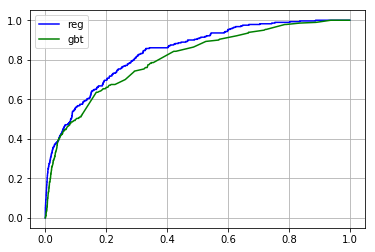

In [3]:
fpr_reg, tpr_reg =  rocPoints("predReg")
fpr_gbt, tpr_gbt =  rocPoints("predGbt")

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr_reg, tpr_reg, color = 'blue', label = "reg")
plt.plot(fpr_gbt, tpr_gbt, color = 'green', label = "gbt")
plt.legend()
plt.grid()
plt.show()

### Roc from library

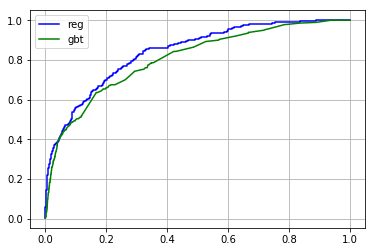

In [4]:
from sklearn.metrics import roc_curve
fpr_reg, tpr_reg, _ =  roc_curve(predictions["label"], predictions["predReg"])
fpr_gbt, tpr_gbt, _ =  roc_curve(predictions["label"], predictions["predGbt"])

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr_reg, tpr_reg, color = 'blue', label = "reg")
plt.plot(fpr_gbt, tpr_gbt, color = 'green', label = "gbt")
plt.legend()
plt.grid()
plt.show()